# pc-gym Test Notebook

Tests constraints, disturbance, oracle on all three models


## Libraries

In [2]:
from dataclasses import dataclass
import numpy as np 
import torch
import matplotlib.pyplot as plt 
import gymnasium as gym
import torch.nn.functional as F
import copy
from stable_baselines3 import PPO,SAC
from pcgym.pcgym import make_env
from pcgym.evaluation_metrics import reproducibility_metric
 
import jax.numpy as jnp
#Global params
T = 26
nsteps = 100

ModuleNotFoundError: No module named 'pcgym.evaluation_metrics'

## Rollout Function

### 1.1 CSTR

In [5]:
#Enter required setpoints for each state. Enter None for states without setpoints.
SP = {
    'Ca': [0.85 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

#Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}

r_scale ={
    'Ca': 5 #Reward scale for each state
}
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, #Setpoint
    'o_space' : observation_space, #Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([0.8,330,0.8]), # Initial conditions (torch.tensor)
    'model': 'cstr_ode', #Select the model
    'r_scale': r_scale, #Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'normalise_a': True, #Normalise the actions
    'normalise_o':True, #Normalise the states,
    'noise':True, #Add noise to the states
    'integration_method': 'casadi', #Select the integration method
    'noise_percentage':0.001 #Noise percentage
}
env = make_env(env_params)


In [6]:
SAC_init = SAC.load('SAC_cstr.zip')

In [7]:
PPO_init = PPO.load('PPO_cstr.zip')

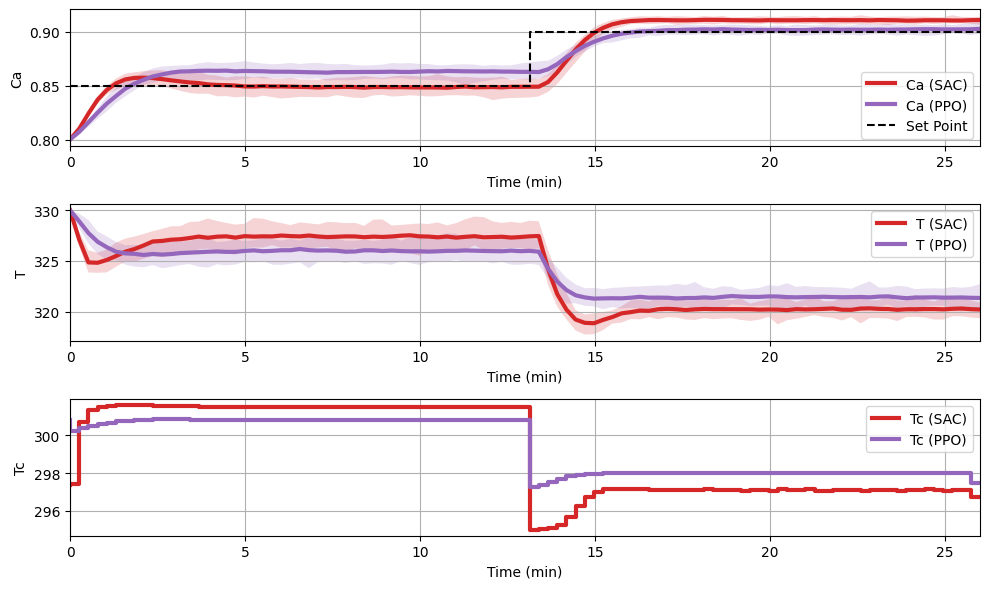

AttributeError: 'make_env' object has no attribute 'n_con'

In [10]:
# NOTE this is how we should roll out and assess the performance of the policies this is untested due to issues with import of reoproducibility_metric
evaluator, data = env.plot_rollout({'SAC':SAC_init,'PPO':PPO_init}, reps=100, oracle = False,dist_reward=True)
policy_measure = reproducibility_metric(dispersion='mad', performance='mean', scalarised_weight=0.3)
scalarised_performance = policy_measure.evaluate(evaluator, component=None)

print('scalarised_performance', scalarised_performance)

### 1.1.1 Reactor with JAX 

In [ ]:
#Enter required setpoints for each state. Enter None for states without setpoints.
SP = {
    'Ca': [0.8 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

#Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}

r_scale ={
    'Ca': 5
}
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, #Setpoint
    'o_space' : observation_space, #Observation space
    'a_space' : action_space, # Action space
    'dt': 1., # Time step
    'x0': np.array([0.8,330,0.8]), # Initial conditions (torch.tensor)
    'model': 'cstr_ode', #Select the model
    'r_scale': r_scale, #Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'normalise_a': True, #Normalise the actions
    'normalise_o':True, #Normalise the states,
    'noise':True, #Add noise to the states
    'integration_method': 'jax',
    'noise_percentage':0.001
}
env = make_env(env_params)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



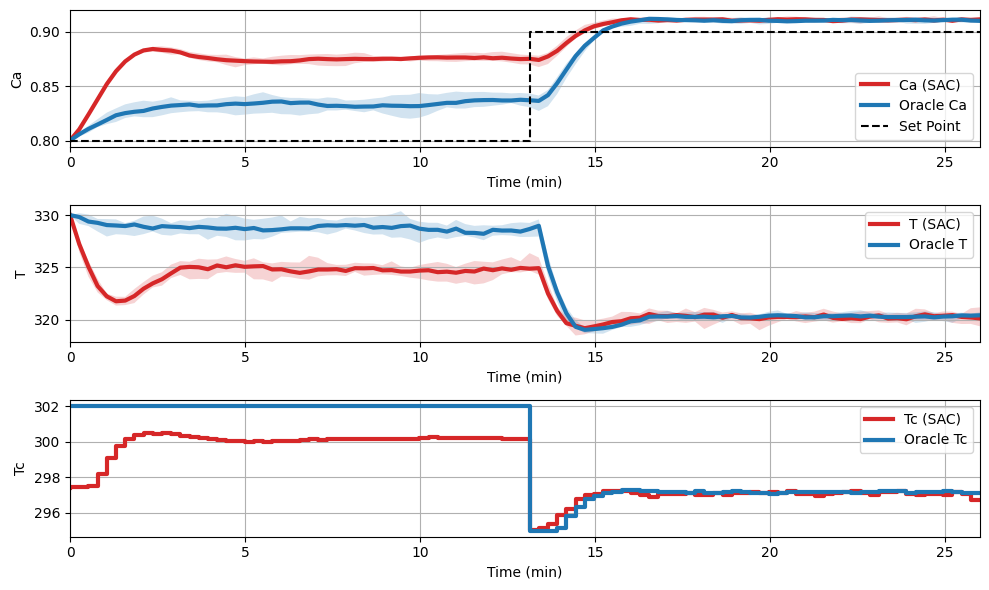

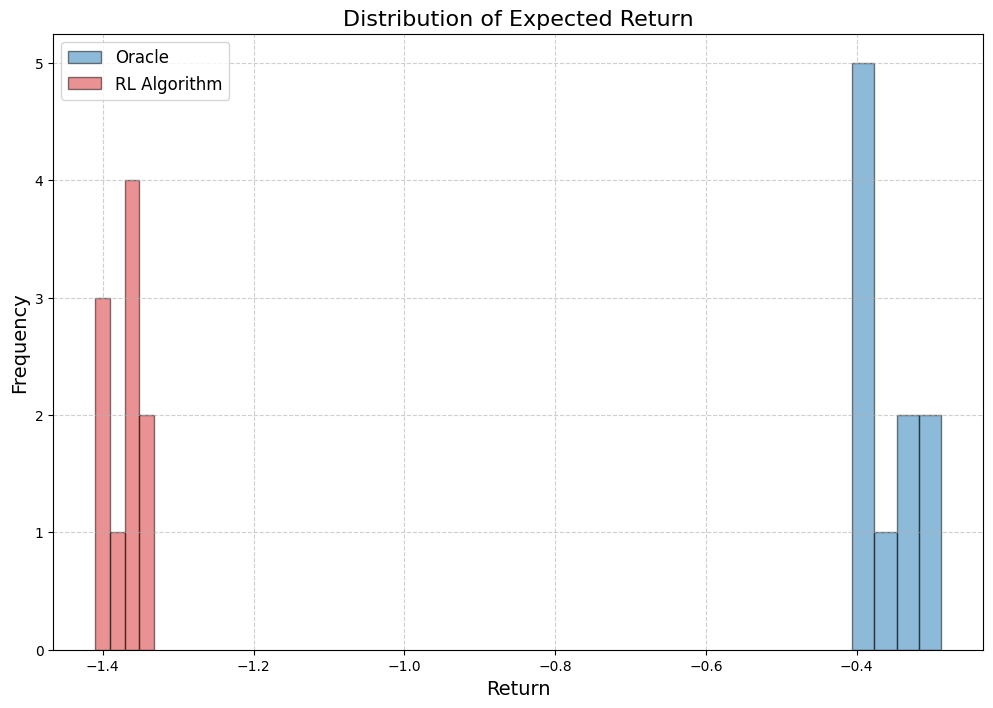

{'r_opt': array([[-0.31545219, -0.40601503, -0.38065189, -0.32800813, -0.37666689,
         -0.38174719, -0.28837275, -0.38279751, -0.32103016, -0.35331888]]),
 'x_opt': array([[[  0.8       ,   0.8       ,   0.8       , ...,   0.8       ,
            0.8       ,   0.8       ],
         [  0.80711287,   0.80591739,   0.8076544 , ...,   0.80688682,
            0.80391046,   0.80745155],
         [  0.81350946,   0.80958054,   0.81303899, ...,   0.8108353 ,
            0.80744465,   0.81261447],
         ...,
         [  0.91158174,   0.91124478,   0.91034119, ...,   0.91159864,
            0.90823607,   0.91061753],
         [  0.90998525,   0.91134142,   0.90942284, ...,   0.91062176,
            0.90847733,   0.91014105],
         [  0.90916917,   0.91106108,   0.90900924, ...,   0.91066893,
            0.90869217,   0.91017361]],
 
        [[330.        , 330.        , 330.        , ..., 330.        ,
          330.        , 330.        ],
         [329.43351149, 329.86695007, 329.28

In [ ]:
_, _ = env.plot_rollout({'SAC':SAC_init},10,oracle = True,dist_reward=True)

### 1.2 First Order System 

In [ ]:
SP = {
    'x': [5 for i in range(int(nsteps/2))] + [8 for i in range(int(nsteps/2))]
}

action_space = {
    'low': np.array([0]),
    'high':np.array([10]) 
}

observation_space = {
    'low' : np.array([0,4]),
    'high' : np.array([10,6])  
}

r_scale = {
    'x': 1,
}
env_params_fos = {
    'N': nsteps,
    'tsim':T,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': np.array([0.,5.]),
    'model': 'first_order_system_ode', 
    'r_scale': r_scale,
    'normalise_a': True, #Normalise the actions
    'normalise_o':True, #Normalise the states,
    'noise':False, #Add noise to the states
    'noise_percentage':0.01,
    'integration_method': 'casadi'
}
first_order_env = make_env(env_params_fos)

In [ ]:
fos_policy = SAC.load('SAC_fos.zip')

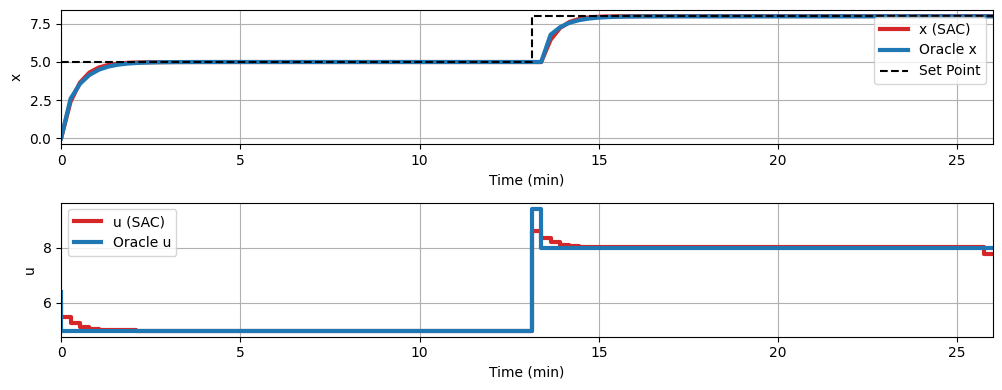

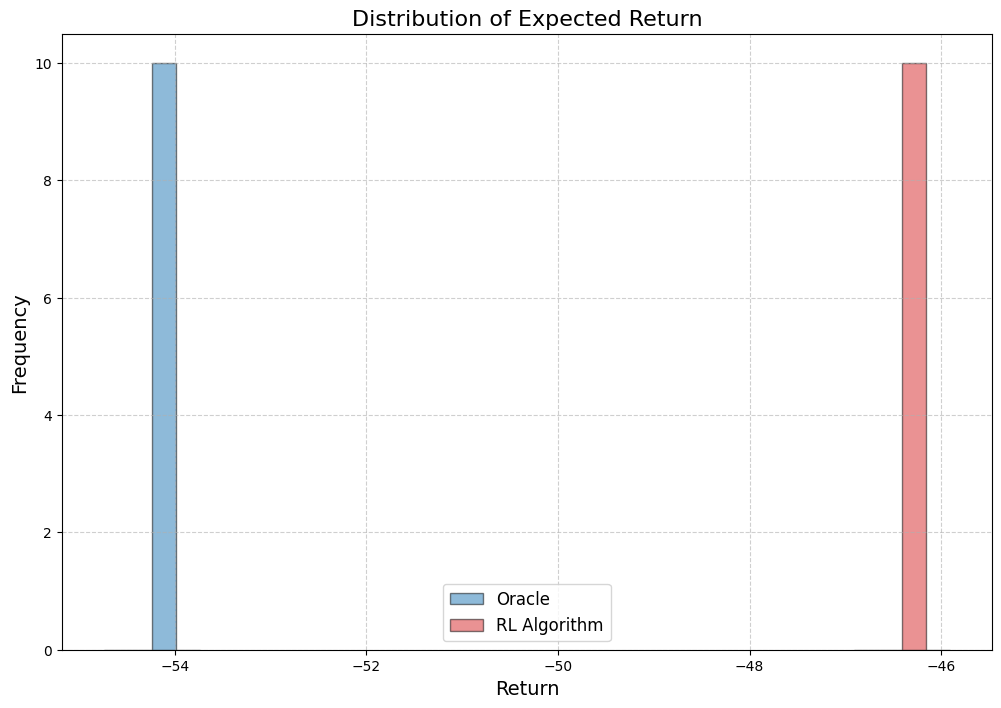

{'r_opt': array([[-54.23524301, -54.23524301, -54.23524301, -54.23524301,
         -54.23524301, -54.23524301, -54.23524301, -54.23524301,
         -54.23524301, -54.23524301]]),
 'x_opt': array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [2.58934292, 2.58934292, 2.58934292, 2.58934292, 2.58934292,
          2.58934292, 2.58934292, 2.58934292, 2.58934292, 2.58934292],
         [3.566813  , 3.566813  , 3.566813  , 3.566813  , 3.566813  ,
          3.566813  , 3.566813  , 3.566813  , 3.566813  , 3.566813  ],
         [4.14793977, 4.14793977, 4.14793977, 4.14793977, 4.14793977,
          4.14793977, 4.14793977, 4.14793977, 4.14793977, 4.14793977],
         [4.49343201, 4.49343201, 4.49343201, 4.49343201, 4.49343201,
          4.49343201, 4.49343201, 4.49343201, 4.49343201, 4.49343201],
         [4.69883452, 4.69883452, 4.69883452, 4.69883452, 4.69883452,
          4.69883452, 4.69883452, 4.6

In [ ]:
_, _ = first_order_env.plot_rollout({'SAC':fos_policy},10,oracle=True,dist_reward=True,MPC_params={'N':10,'R':0.0})

### 1.3 Multi-Stage Extraction Column

In [ ]:
SP = {
      'X5': [0.3 for i in range(int(nsteps/4))] + [0.4 for i in range(int(nsteps/2))]+ [0.3 for i in range(int(nsteps/4))],
  }

action_space = {
    'low': np.array([5,10]),
    'high':np.array([500,1000])
}

observation_space = {
    'low' : np.array([0]*10+[0.3]),
    'high' : np.array([1]*10+[0.4])  
}


r_scale = {
    'X5': 1
}
env_params_ms = {
    'N': nsteps,
    'tsim':T,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': np.array([0.55, 0.3, 0.45, 0.25, 0.4, 0.20, 0.35, 0.15, 0.25, 0.1,0.3]),
    'model': 'multistage_extraction_ode', 
    'r_scale': r_scale,
    'normalise_a': True, #Normalise the actions
    'normalise_o':True, #Normalise the states,
    'noise':False, #Add noise to the states
    'noise_percentage':0,
    'integration_method': 'casadi'
}
multistage_env = make_env(env_params_ms)



In [ ]:
ms_policy = SAC.load("SAC_multistage.zip")


CasADi - 2024-03-14 11:20:03 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 40, col 0).") [.../casadi/core/oracle_function.cpp:377]
CasADi - 2024-03-14 11:20:03 WARNING("solver:nlp_g failed: Inf detected for output g, at (row 42, col 0).") [.../casadi/core/oracle_function.cpp:377]
CasADi - 2024-03-14 11:20:04 WARNING("solver:nlp_g failed: Inf detected for output g, at (row 20, col 0).") [.../casadi/core/oracle_function.cpp:377]
CasADi - 2024-03-14 11:20:06 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 40, col 0).") [.../casadi/core/oracle_function.cpp:377]
CasADi - 2024-03-14 11:20:06 WARNING("solver:nlp_g failed: Inf detected for output g, at (row 42, col 0).") [.../casadi/core/oracle_function.cpp:377]
CasADi - 2024-03-14 11:20:06 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 40, col 0).") [.../casadi/core/oracle_function.cpp:377]
CasADi - 2024-03-14 11:20:06 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 30, co

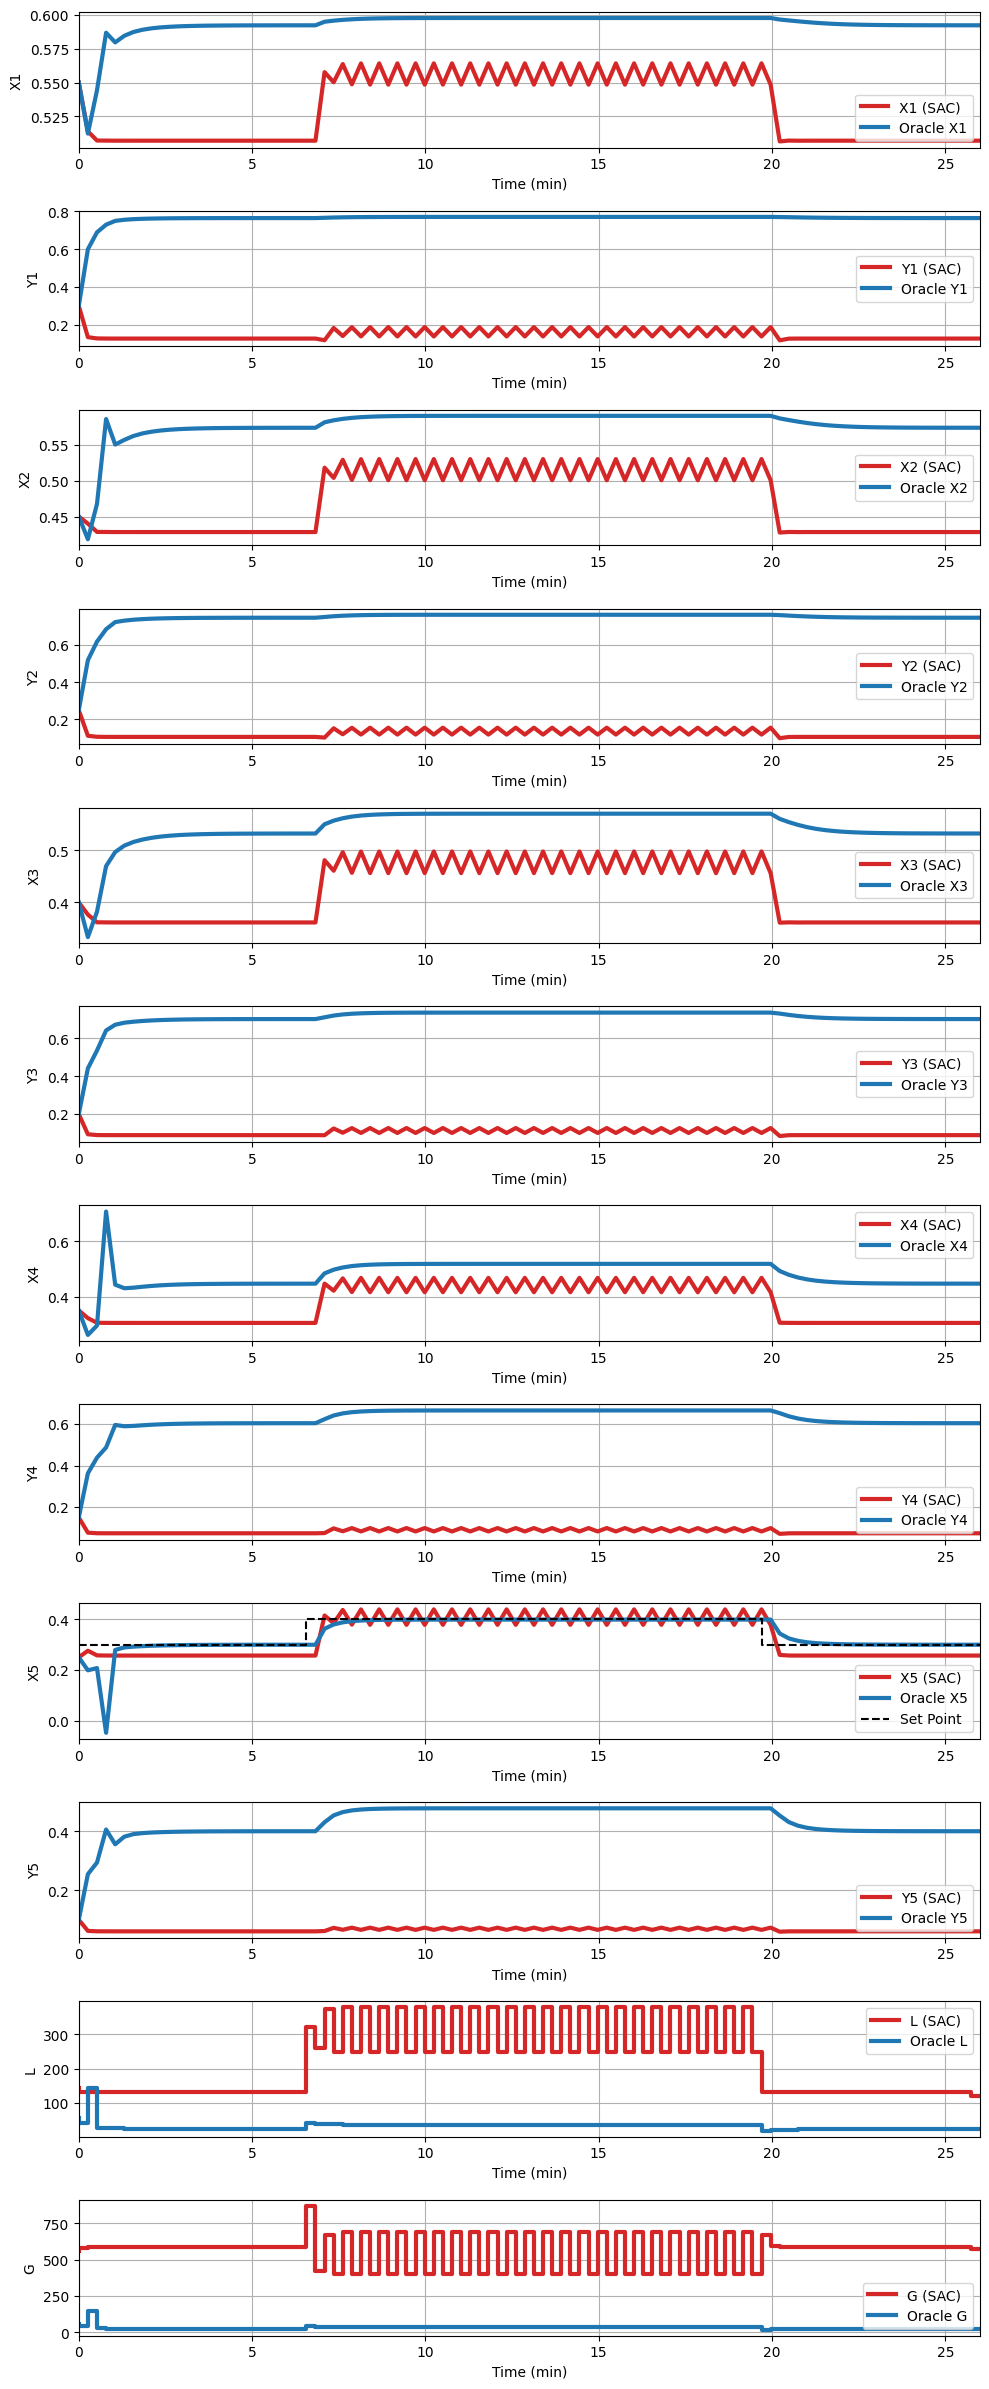

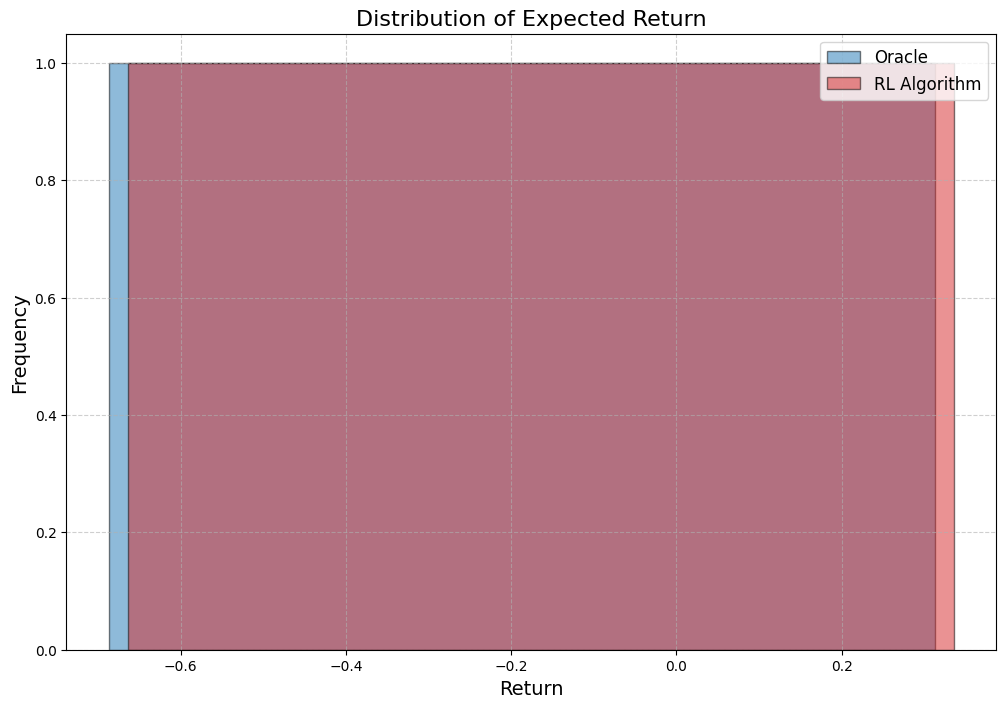

{'r_opt': array([[-0.18728844]]),
 'x_opt': array([[[ 0.55      ],
         [ 0.51242934],
         [ 0.54426405],
         [ 0.58665539],
         [ 0.57956053],
         [ 0.58439456],
         [ 0.58720078],
         [ 0.58886619],
         [ 0.58991142],
         [ 0.59059547],
         [ 0.59105653],
         [ 0.59137354],
         [ 0.59159437],
         [ 0.59174951],
         [ 0.5918591 ],
         [ 0.5919368 ],
         [ 0.59199201],
         [ 0.5920313 ],
         [ 0.5920593 ],
         [ 0.59207926],
         [ 0.5920935 ],
         [ 0.59210366],
         [ 0.59211091],
         [ 0.59211608],
         [ 0.59211977],
         [ 0.59212241],
         [ 0.59212429],
         [ 0.59475129],
         [ 0.59555372],
         [ 0.59614133],
         [ 0.59657662],
         [ 0.59688694],
         [ 0.59710082],
         [ 0.59724447],
         [ 0.59733915],
         [ 0.59740073],
         [ 0.59744039],
         [ 0.59746576],
         [ 0.59748191],
         [ 0.59749215

In [ ]:
_, _ = multistage_env.plot_rollout({'SAC':ms_policy},1,oracle=True,dist_reward=True)

## 2. Disturbance Function

### 2.1 Reactor Disturbance

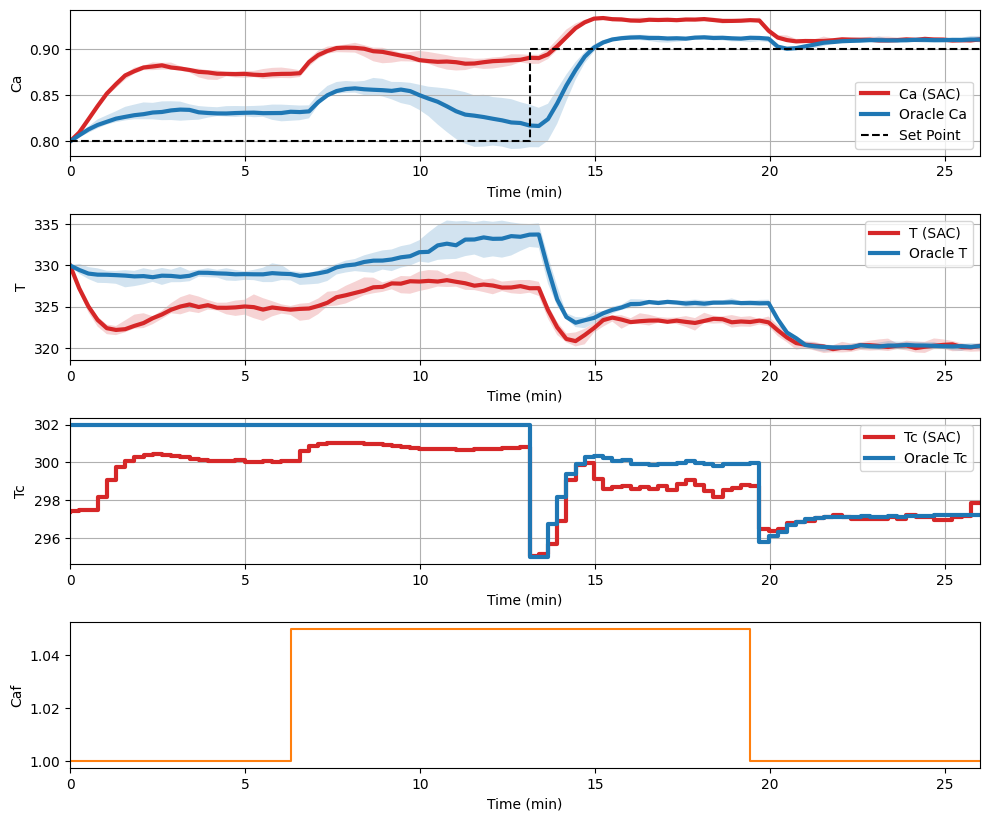

In [ ]:
disturbance = {'Caf': np.repeat([1, 1.05, 1], [nsteps//4, nsteps//2, nsteps//4])}
env = make_env({**env_params, 'disturbances': disturbance}).plot_rollout({'SAC':SAC_init}, reps = 10, oracle= True)

### 2.2 Multistage Extraction 

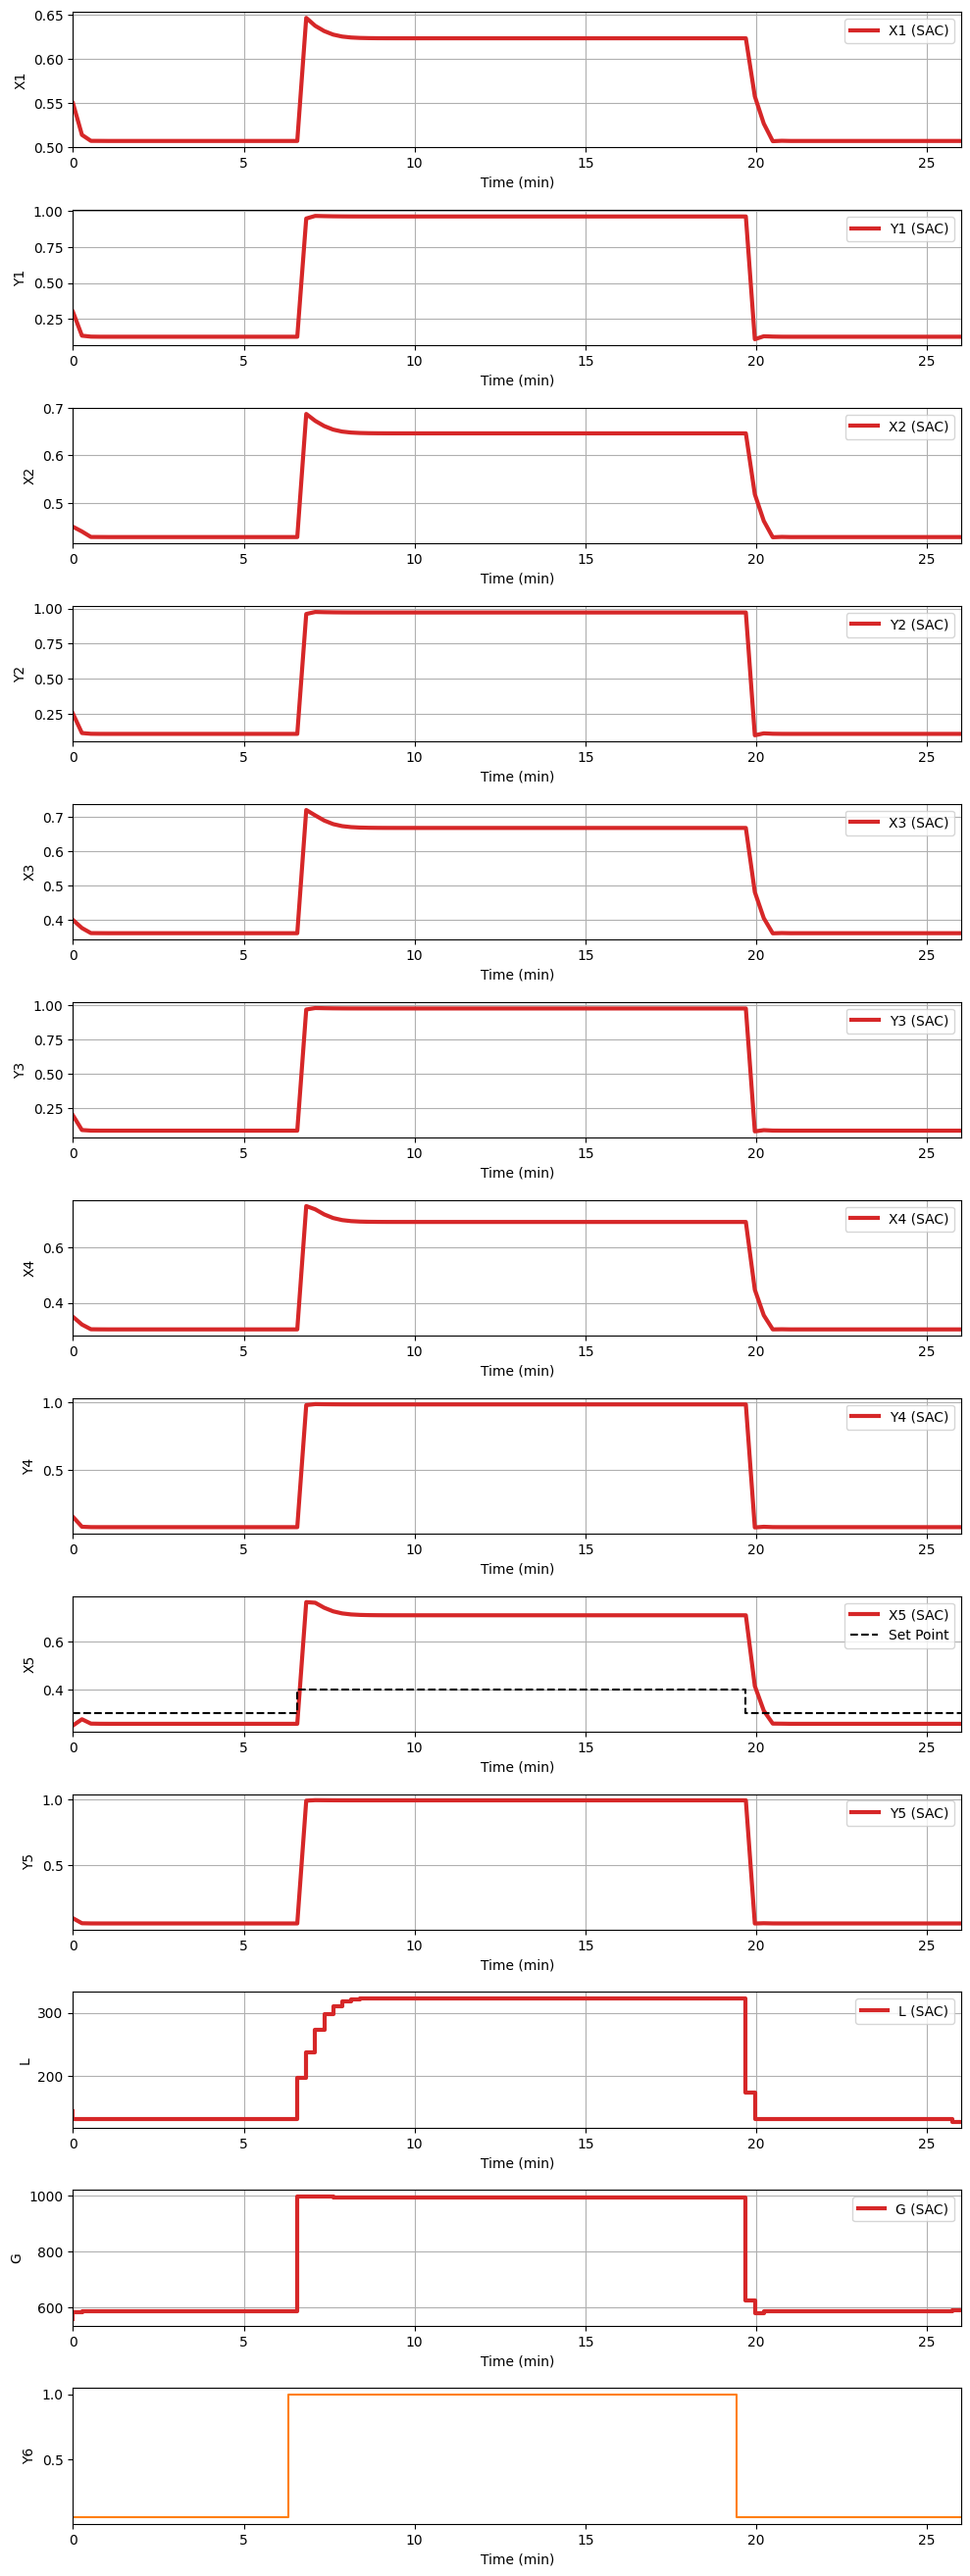

{'r_RL_SAC': array([[-5.07892338, -5.07892338, -5.07892338, -5.07892338, -5.07892338,
         -5.07892338, -5.07892338, -5.07892338, -5.07892338, -5.07892338]]),
 'x_RL_SAC': array([[[0.55      , 0.55      , 0.55      , ..., 0.55      ,
          0.55      , 0.55      ],
         [0.51407358, 0.51407358, 0.51407358, ..., 0.51407358,
          0.51407358, 0.51407358],
         [0.50729136, 0.50729136, 0.50729136, ..., 0.50729136,
          0.50729136, 0.50729136],
         ...,
         [0.50717746, 0.50717746, 0.50717746, ..., 0.50717746,
          0.50717746, 0.50717746],
         [0.50717746, 0.50717746, 0.50717746, ..., 0.50717746,
          0.50717746, 0.50717746],
         [0.50717746, 0.50717746, 0.50717746, ..., 0.50717746,
          0.50717746, 0.50717746]],
 
        [[0.3       , 0.3       , 0.3       , ..., 0.3       ,
          0.3       , 0.3       ],
         [0.13461195, 0.13461195, 0.13461195, ..., 0.13461195,
          0.13461195, 0.13461195],
         [0.12807725, 0.

In [ ]:
disturbance = {
    'Y6': np.array([0.05 for i in range(int(nsteps/4))]+[1 for i in range(int(nsteps/2))]+[0.05 for i in range(int(nsteps/4))]),
}

env_params_ms.update({'disturbances': disturbance,})
                

multistage_env = make_env(env_params_ms)

_,_ = multistage_env.plot_rollout({'SAC':ms_policy},10)

## 3. Constraint Function

### 3.1 Reactor Constraint

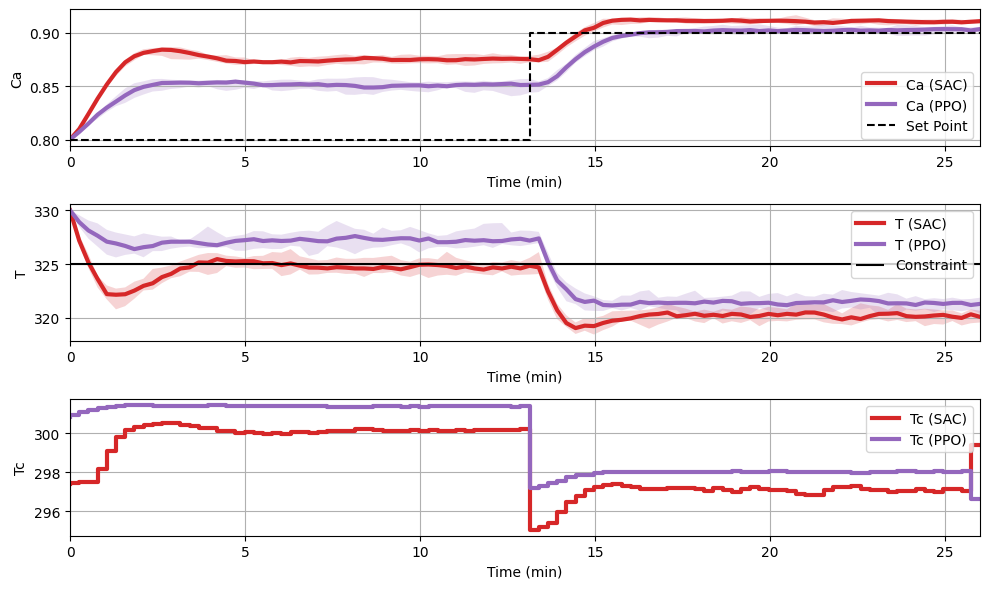

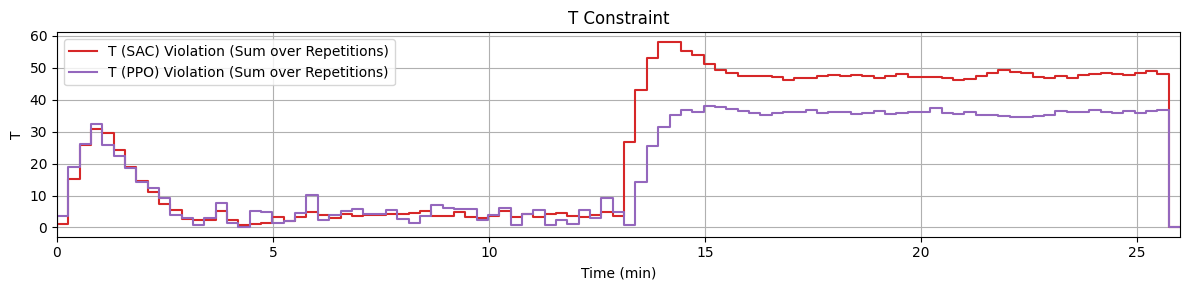

{'r_RL_SAC': array([[-82001.36558697, -94001.36214447, -87001.36660415,
         -85001.35433214, -83001.32912219, -81001.35072735,
         -89001.37308624, -81001.35157751, -84001.36989778,
         -88001.35787302]]),
 'x_RL_SAC': array([[[  0.80000001,   0.80000001,   0.80000001, ...,   0.80000001,
            0.80000001,   0.80000001],
         [  0.81056417,   0.8104935 ,   0.80962811, ...,   0.80988876,
            0.8110585 ,   0.80889036],
         [  0.82359865,   0.82359114,   0.82400904, ...,   0.82191454,
            0.82453147,   0.82400102],
         ...,
         [  0.90931834,   0.9109871 ,   0.91033581, ...,   0.90944642,
            0.91191457,   0.9102964 ],
         [  0.9088464 ,   0.91120016,   0.90981559, ...,   0.91125389,
            0.91014983,   0.91115025],
         [  0.90871344,   0.91192515,   0.9121725 , ...,   0.91105749,
            0.90920117,   0.91146978]],
 
        [[330.        , 330.        , 330.        , ..., 330.        ,
          330.     

In [ ]:
cons = {
    'T': [325]
}

cons_type = {
    'T':['>=']
}

env_params.update({
'done_on_cons_vio':False,
'constraints': cons, 
'cons_type': cons_type,
'r_penalty': True})
env_params.pop('disturbances', None)
env = make_env(env_params)
_, _ = env.plot_rollout({'SAC':SAC_init,'PPO':PPO_init},10,cons_viol=True)

### 3.2 First-Order-System Constraint

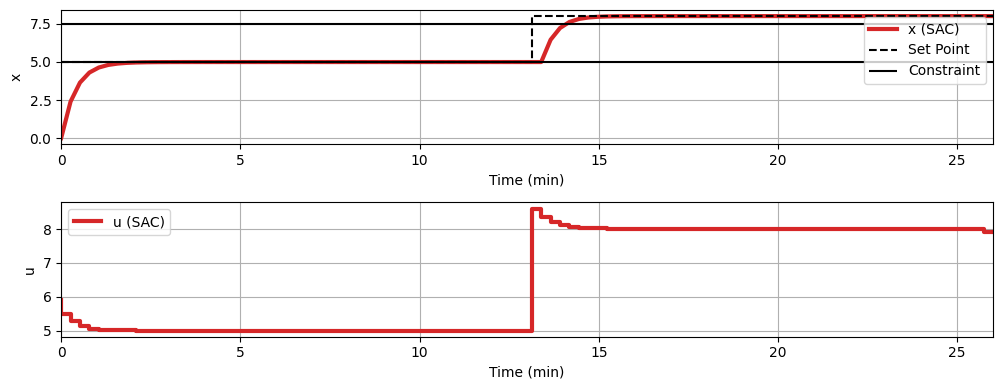

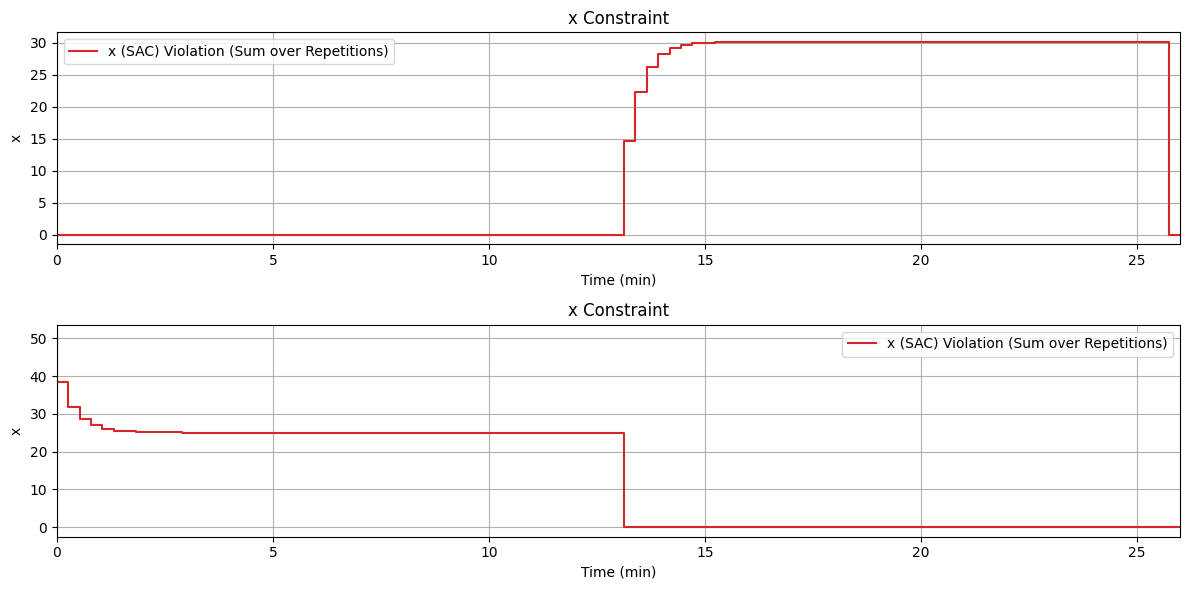

{'r_RL_SAC': array([[-99046.41216045, -99046.41216045, -99046.41216045,
         -99046.41216045, -99046.41216045, -99046.41216045,
         -99046.41216045, -99046.41216045, -99046.41216045,
         -99046.41216045]]),
 'x_RL_SAC': array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [2.39958057, 2.39958057, 2.39958057, ..., 2.39958057,
          2.39958057, 2.39958057],
         [3.64888719, 3.64888719, 3.64888719, ..., 3.64888719,
          3.64888719, 3.64888719],
         ...,
         [8.01444709, 8.01444709, 8.01444709, ..., 8.01444709,
          8.01444709, 8.01444709],
         [8.01444709, 8.01444709, 8.01444709, ..., 8.01444709,
          8.01444709, 8.01444709],
         [8.01444709, 8.01444709, 8.01444709, ..., 8.01444709,
          8.01444709, 8.01444709]],
 
        [[5.        , 5.        , 5.        , ..., 5.        ,
          5.        , 5.        ],
         [5.        , 5.        , 5.        , ..., 5.        ,
 

In [ ]:
cons = {
    'x': [5,7.5]
}

cons_type = {
    'x': ['<=','>=']
}

env_params_fos.update({
'done_on_cons_vio':False,
'constraints': cons, 
'cons_type': cons_type,
'r_penalty': True})
env_params_fos.get('constraints') is not None
env = make_env(env_params_fos)
_, _ = env.plot_rollout({'SAC':fos_policy},10,cons_viol=True)

### 3.3 Multistage Extraction Constraint 

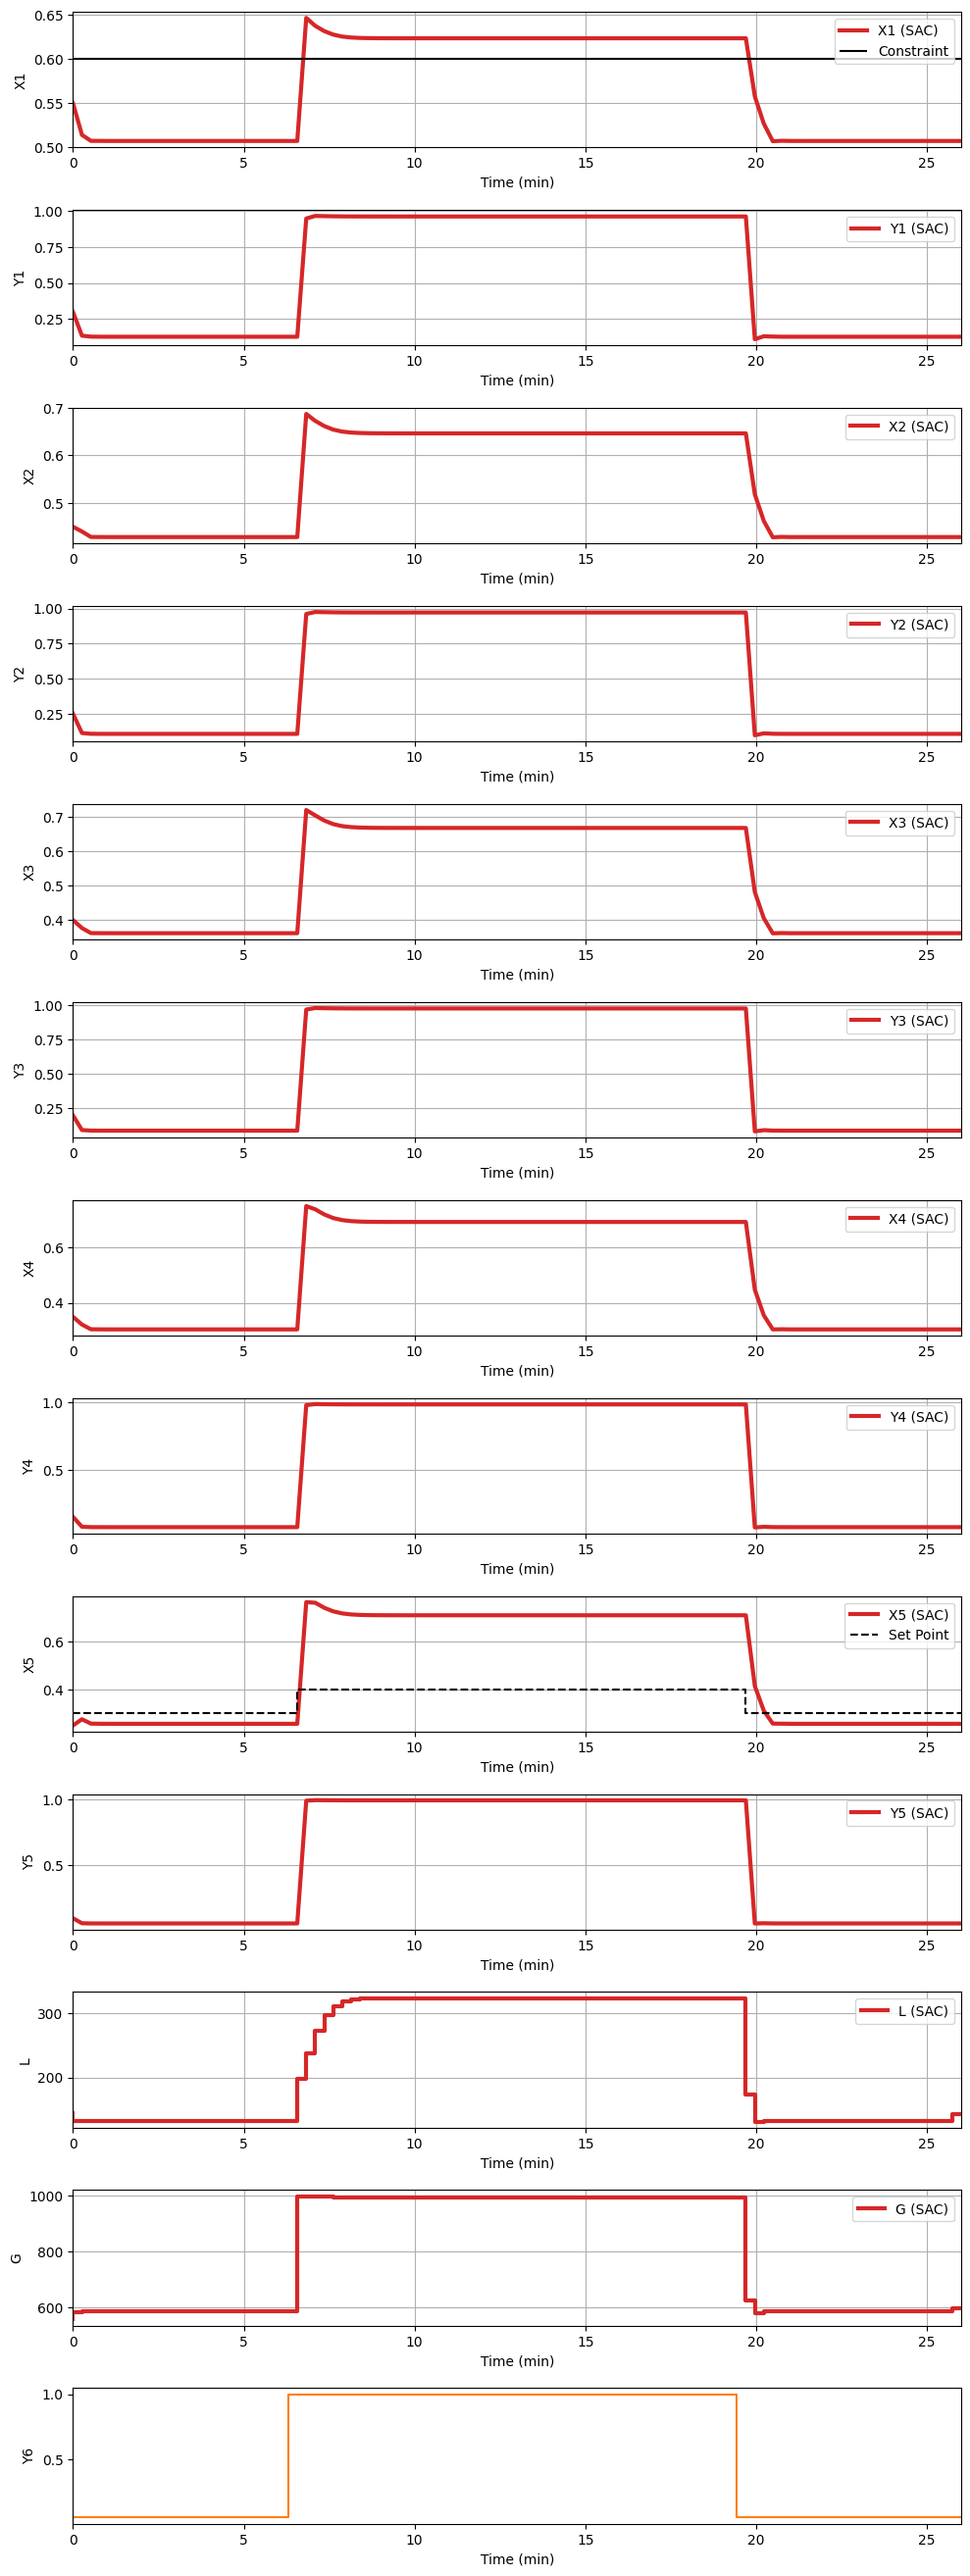

{'r_RL_SAC': array([[-5.07892338, -5.07892338, -5.07892338, -5.07892338, -5.07892338,
         -5.07892338, -5.07892338, -5.07892338, -5.07892338, -5.07892338]]),
 'x_RL_SAC': array([[[0.55      , 0.55      , 0.55      , ..., 0.55      ,
          0.55      , 0.55      ],
         [0.51407358, 0.51407358, 0.51407358, ..., 0.51407358,
          0.51407358, 0.51407358],
         [0.50729136, 0.50729136, 0.50729136, ..., 0.50729136,
          0.50729136, 0.50729136],
         ...,
         [0.50717746, 0.50717746, 0.50717746, ..., 0.50717746,
          0.50717746, 0.50717746],
         [0.50717746, 0.50717746, 0.50717746, ..., 0.50717746,
          0.50717746, 0.50717746],
         [0.50717746, 0.50717746, 0.50717746, ..., 0.50717746,
          0.50717746, 0.50717746]],
 
        [[0.3       , 0.3       , 0.3       , ..., 0.3       ,
          0.3       , 0.3       ],
         [0.13461195, 0.13461195, 0.13461195, ..., 0.13461195,
          0.13461195, 0.13461195],
         [0.12807725, 0.

In [ ]:
cons = {
    'X1': [0.6],
}

cons_type = {
    'X1':'<='
}

env_params_ms.update({
'done_on_cons_vio':False,
'constraints': cons, 
'cons_type': cons_type,
'r_penalty': True})
env_params_ms.get('constraints') is not None
env = make_env(env_params_ms)
_, _ = env.plot_rollout({'SAC':ms_policy},10)